In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nbformat
import plotly.graph_objects as go
import cmath 

from scipy.stats import normaltest, levene, norm
from scipy.optimize import curve_fit
from scipy.stats import f_oneway
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft, ifft


sns.set_theme()
sns.set_palette("deep")

# Пример

## Параметры установки

In [3]:
mass_proton = 938.256 * 10**6 # масса покоя протона 
mass_proton_kg = 1.67252 * 10**(-24) # тоже самое только в кг (но нужно проверить)
mass_neutron = 938.2 * 10**6 # масса покоя нейрона 
mass_electron = 0.5111006 * 10**6 # масса покоя электрона
mass_electron_kg = 9.109383 * 10**(-28) # масса электрона кг

charge_electron  = 1.6021 * 10**(-19) # заряд электрона в Кл 
e_conv = 299.7925 # ПОСМОТРЕТЬ (коэф перевода )
charge_electron_sgs = 4.80298 * 10*(-10) # заряд электрона СГС 

charge_number = 28 # зарядовое число 
mass_number = 124 # массовое число
booster_perimeter = 21096 # периметр бустера в мм

radius_proton  = (e_conv * charge_electron_sgs) / mass_proton # радиус протона 
radius_electron = (charge_electron_sgs * e_conv) / mass_electron # радиус электрона

phase = 1.38054 * 10**(-16) # ----
Z_n = 377 # --- 
speed_of_light = 2.997925 * 10**10

## Чтение данных

In [36]:
booster_fct_path = r'../data/booster_acceleration/1/27_01_23_booster_fct_1.bin'
booster_rf_path = r'../data/booster_acceleration/1/27_01_23_booster_rf_1.bin'

In [76]:
data_length = 7 * 32 * 128 * 1024
delta_time = (50 * 10e5)**(-1)

offset_fct = 45 # сдвиг начала 
offset_rf = 10     
shift_periods_number = 1500 # сдвиг конца
injection_period = 425.067 # период на энжекции (период можно высчетать как в прошлом файле)

number_period = np.floor(data_length / injection_period)

In [77]:
signal_fct = np.fromfile(booster_fct_path, dtype='int16')[:data_length+1]
signal_rf = np.fromfile(booster_rf_path, dtype='int16')[:data_length+1]

In [78]:
injection_period_range = np.arange(injection_period, dtype=int)

slice_start_fct = injection_period_range + offset_fct
slice_last_fct = offset_fct + injection_period_range + int(shift_periods_number * injection_period)

slice_start_rf = injection_period_range + offset_rf
slice_last_rf = offset_rf + injection_period_range + int(shift_periods_number * injection_period)

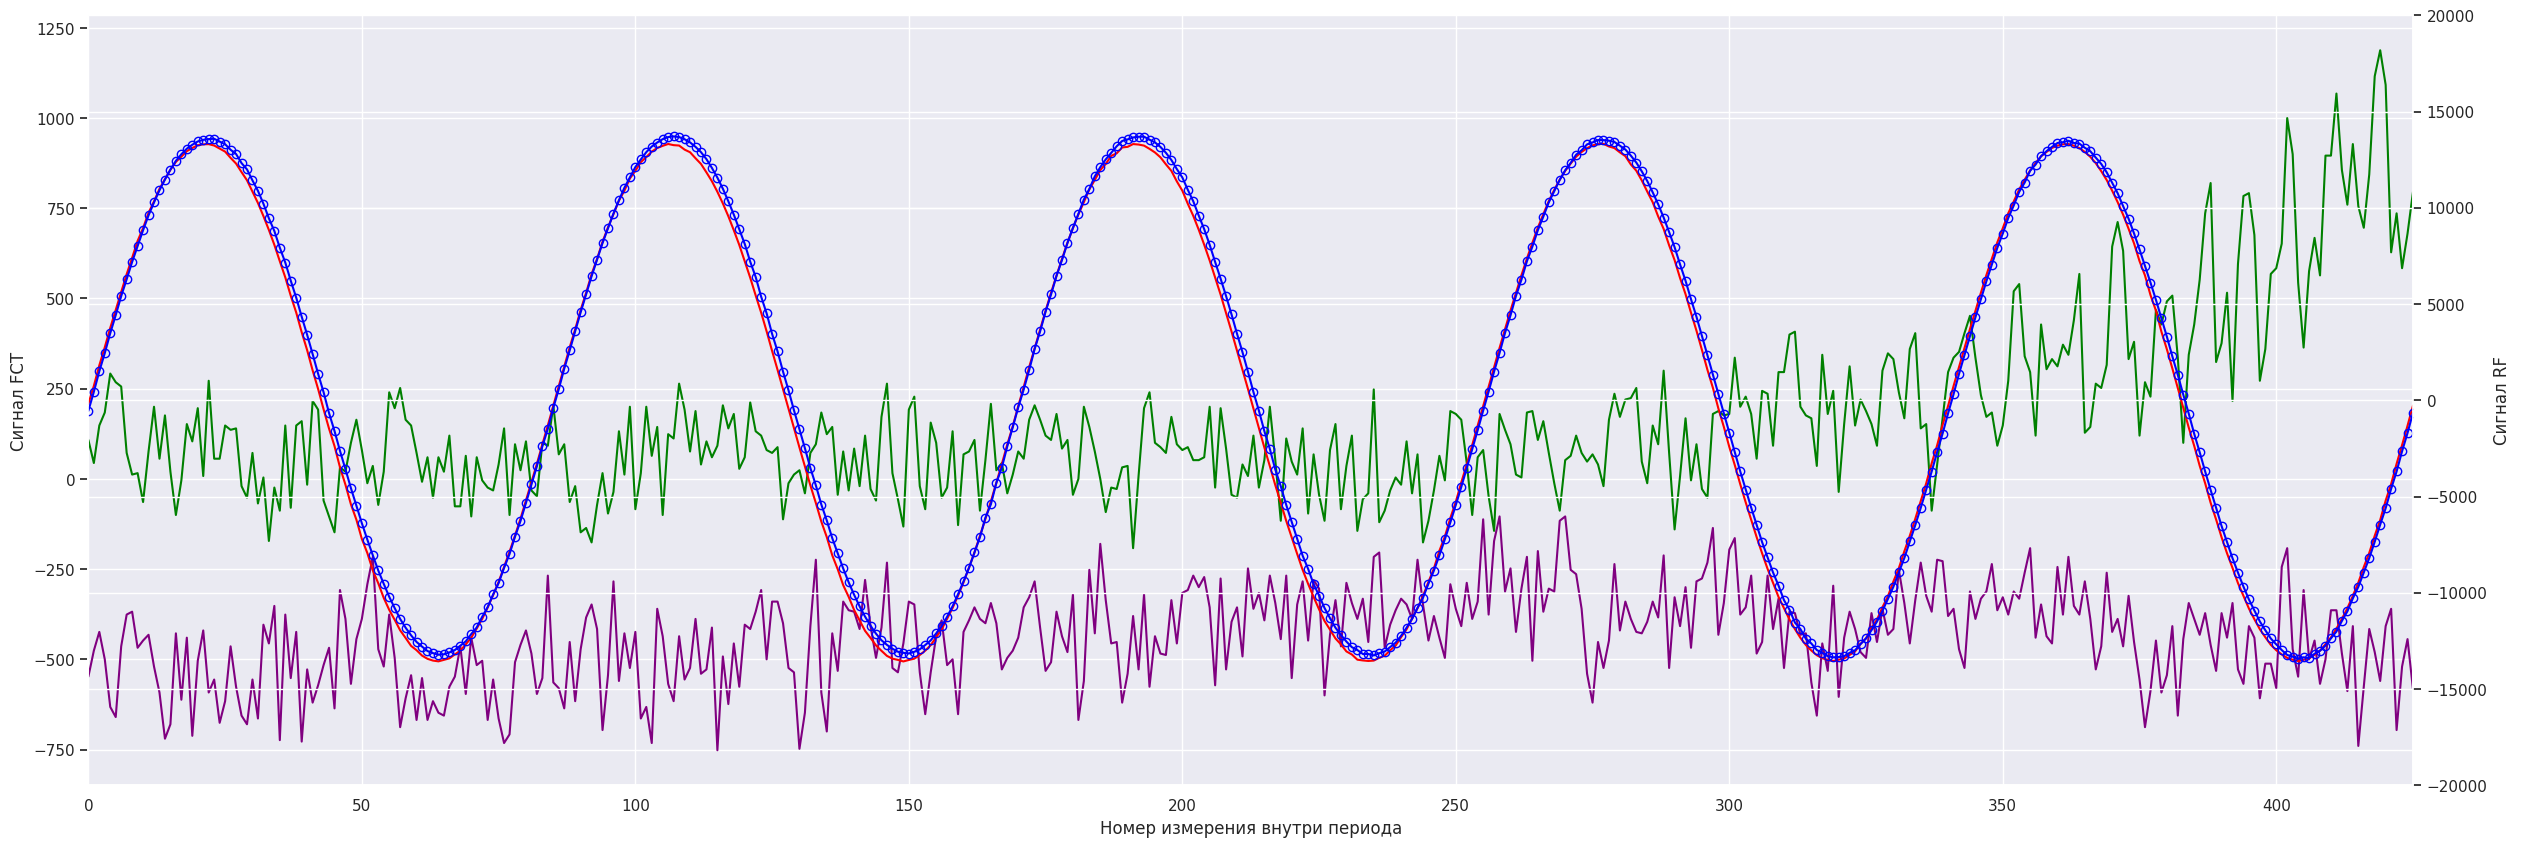

In [80]:
fig = plt.figure(figsize=(30, 10))

plt.plot(injection_period_range, signal_fct[slice_start_fct], color='green')
plt.plot(injection_period_range, signal_fct[slice_last_fct], color='purple')
plt.ylabel('Сигнал FCT')
plt.xlabel('Номер измерения внутри периода')

plt.twinx()

plt.plot(injection_period_range, signal_rf[slice_start_rf], color='red')
plt.plot(injection_period_range, signal_rf[slice_last_rf], marker='o', color='blue', markerfacecolor='none')
plt.ylabel('Сигнал RF')

plt.xlim([0, injection_period])
plt.ylim([-2*10**(4), 2*10**4]);